In [8]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display
import numpy as np
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

#conversion function for turning string numbers (ex: 5K) into actual numbers(ex: 5000)
def convert(value):
    if value:
        multiple = 1
        if value.endswith("K"):
            multiple = 1000
            value = value[0:len(value)-1]
        elif value.endswith("M"):
            multiple = 1000000
            value = value[0:len(value)-1]
        return int(float(value) * multiple)
    else:
        return 0
    

#read instagram file 1
instaFile ="Resources/social media influencers - instagram.csv" 
instagram_df1= pd.read_csv(instaFile)
#display(instagram_df1)

#read instagram file 2
instaFile2="Resources/instagram_global_top_1000.csv"
instagram_df2= pd.read_csv(instaFile2)
#display(instagram_df2)

#read in youtube data 1
youtubeFile ="Resources/social media influencers - youtube.csv" 
youtube_df= pd.read_csv(youtubeFile)
youtube_df

#read youtube data 2
youtubeFile_2 ="Resources/Top YouTube Channels Data.csv"
youtubeFile_2=pd.read_csv(youtubeFile_2)
youtubeFile_2

#data cleaning for Instagram

#display(instagram_df1.isnull().sum())
#drop rows from dataframe where category is missing
#drop rows where country data is missing

instagram_df1 = instagram_df1.dropna(subset=['category_1'])
instagram_df1 = instagram_df1.dropna(subset=['Audience country(mostly)'])
# Check how many having missing are dropped
#display(instagram_df1.isnull().sum())

#drop rows with duplicate instagram instance name
instagram_df1 =instagram_df1.drop_duplicates(subset=["instagram name"],keep='last')

#remove spaces if any from attributes
instagram_df1.columns = instagram_df1.columns.str.replace(' ', '')
# replace messy string column names
instagram_df1.columns=instagram_df1.columns.str.replace('[\t|\n|\r]','',regex=True)


#Convert millions(M) and thousands(K) string data values from 3 columns to numerical form
instagram_df1["Followers"]=instagram_df1["Followers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
instagram_df1["Authenticengagement"]=instagram_df1["Authenticengagement"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
instagram_df1["Engagementavg"]=instagram_df1["Engagementavg"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)


#link and see the other dataset
#remove spaces if any from attributes
instagram_df2.columns = instagram_df2.columns.str.replace(' ', '')

#data cleaning for youtube
#find duplicate youtubers
yt_unique = len(youtube_df["youtuber name"].unique())
youtube_df.loc[youtube_df.duplicated(keep = False),:]

#data cleaning for youtube data
clean_yt = youtube_df.drop(549)
clean_yt["Subscribers"] = [convert(value) for value in clean_yt["Subscribers"]]
clean_yt["avg views"] = [convert(value) for value in clean_yt["avg views"]]
clean_yt["avg likes"] = clean_yt["avg likes"].fillna(0)
clean_yt["avg likes"] = [convert(value) for value in clean_yt["avg likes"]]
clean_yt["avg comments"] = clean_yt["avg comments"].fillna(0)
clean_yt["avg comments"] = [convert(value) for value in clean_yt["avg comments"]]
clean_yt.sort_values("Subscribers", ascending = False).reset_index()

clean_yt = clean_yt.dropna(subset = ["Category"])
clean_yt.reset_index()

#drop rows from Audience Country that are empty
clean_yt = clean_yt.dropna(subset = ["Audience Country"])
clean_yt.reset_index()

#Sum the column values from avg_views,avg_likes,avg_comments to a new column "Authenticengagement" 
clean_yt['Authenticengagement'] = clean_yt['avg views'] + clean_yt['avg likes'] +clean_yt['avg comments']
#display(clean_yt)

#data cleaning for second youtube file
#remove spaces if any from attributes
youtubeFile_2.columns = youtubeFile_2.columns.str.replace(' ', '')
# replace messy string column names
youtubeFile_2.columns=youtubeFile_2.columns.str.replace('[\t|\n|\r]','',regex=True)
youtubeFile_2

# Data export csv for review
instagram_df1.to_csv("DataFiles/instagram_df1.csv", index=False, header=True)
instagram_df2.to_csv("DataFiles/instagram_df2.csv", index=False, header=True)
clean_yt.to_csv("DataFiles/clean_yt.csv", index=False, header=True)
youtubeFile_2.to_csv("DataFiles/youtubeFile_2.csv", index=False, header=True)



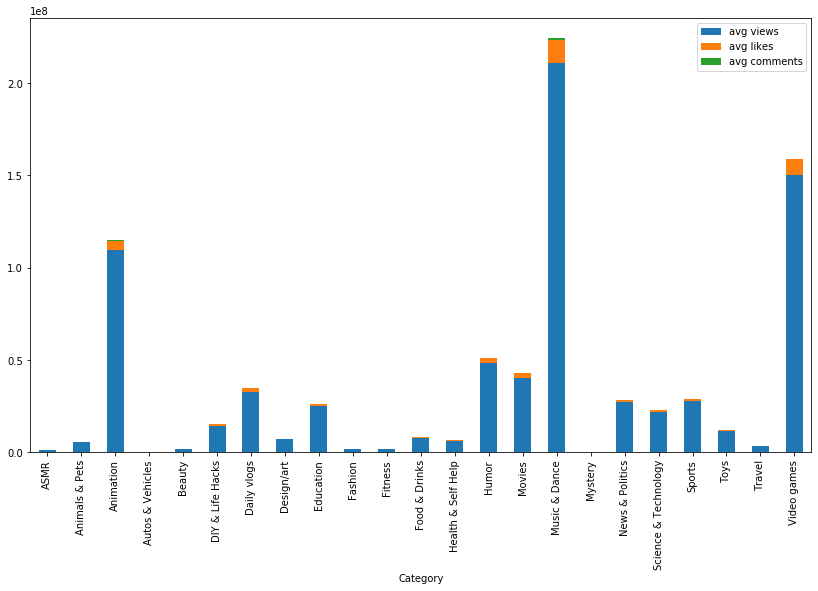

In [9]:
#Exploration

#Engagement type per category 
#groupby function on countries from youtube data

groupby_clean_yt = clean_yt.groupby(["Category"]).sum()
youtube_vlc= groupby_clean_yt[['avg views','avg likes','avg comments']]
youtube_vlc


youtube_vlc.plot.bar(stacked=True,figsize=(14,8))
plt.show()